In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark")  

In [2]:
# get pmdarima library for auto Arima 

!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.6/654.6 kB 8.8 MB/s eta 0:00:00:00:010:01


In [ ]:
# get airline passenger data if you dont have it already

# !wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col=0, parse_dates=True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Recall that previously we noticed log transform made the ARIMA models to achieve better accuracy 

df['LogPassengers'] = np.log(df['Passengers'])

df.head()

,Passengers,LogPassengers
Month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


In [5]:
# train test split 

Ntest = 12
train = df[:-Ntest]
test = df[-Ntest:]

In [6]:
# import pmdarima library

import pmdarima as pm

In [7]:
# train and fit 

model = pm.auto_arima(train['Passengers'], trace = True, suppress_warnings=True, seasonal = True, m = 12) # trace to see which models auto_arima tests out 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.20 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.11 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.16 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Wed, 10 Apr 2024   AIC                            905.686
Time:                                    12:05:15   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# get the predictions and confidence intervals for the predictions 

test_pred, confint = model.predict(n_periods = Ntest, return_conf_int=True)

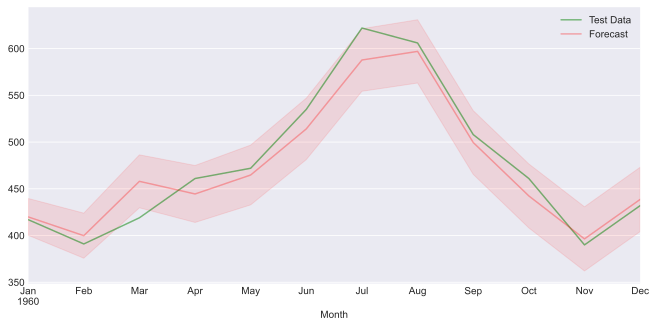

In [12]:
# plot the predictions and confidence interval with respect to the test set 

fig, axes = plt.subplots(figsize = (11,5))

test['Passengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Test Data')

test_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.grid()

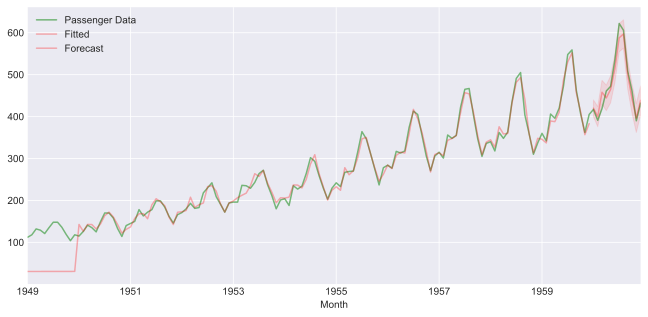

In [13]:
# plot predictions for the whole data and conf interval for the test 

# first get in sample predictions (training predictions) using predict_in_sample() method 

train_pred = model.predict_in_sample(start = 0, end = -1)

fig, axes = plt.subplots(figsize = (11,5))

df['Passengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Passenger Data')

train_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Fitted')

test_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.grid()


Predicitons for the beginning of the training set is quite off and the reason for this is that we are using a Seasonal Arima model (SARIMA) which requires information from previous season which simply do not exist! 

In [14]:
# Lets define the log_model using the log transformed Passenger data 

log_model = pm.auto_arima(train['LogPassengers'], trace = True, suppress_warnings=True, seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.529, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.299, Time=0.63 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.33 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=1.65 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.715, Time=0.62 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.574, Time=0.64 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.28 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-439.306, Time=0.49 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.393, Time=1.05 sec
 ARIMA(1,0,2)(1,1,0)[12]

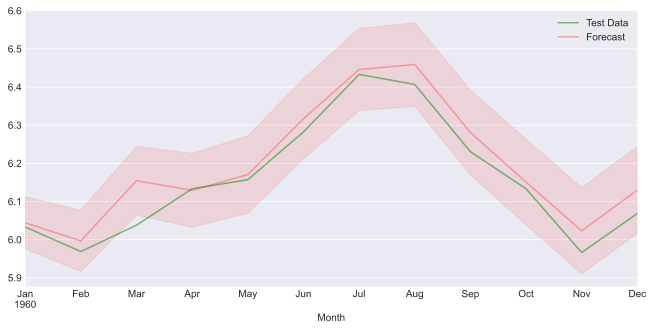

In [21]:
# get the test predictions and plot 

test_pred_log, confint = log_model.predict(n_periods = Ntest, return_conf_int=True)

fig, axes = plt.subplots(figsize = (11,5))

test['LogPassengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Test Data')

test_pred_log.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.grid()

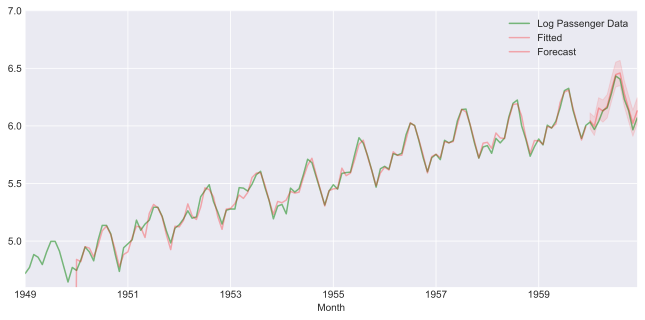

In [20]:
# plot predictions for the whole data and conf interval for the test 

# first get in sample predictions (training predictions) using predict_in_sample() method 

train_pred = log_model.predict_in_sample(start = 0, end = -1)

fig, axes = plt.subplots(figsize = (11,5))

df['LogPassengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Log Passenger Data')

train_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Fitted')

test_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.set_ylim(4.6,7)

axes.grid()

In [26]:
# Since both logged and non-logged models perform quite well lets compare them using RMSE

print(f"RMSE on the non-logged data set: {mean_squared_error(test['Passengers'],test_pred, squared =False):.2f}")
print(f"RMSE on the logged data set: {mean_squared_error(test['Passengers'],np.exp(test_pred_log), squared=False):.2f}")

RMSE on the non-logged data set: 18.54
RMSE on the logged data set: 23.04


Using a seasonal ARIMA model we found the opposite of what we have found previously: logged model does perform worse than the non-logged version!

In [32]:
# Test auto_arima to see if it can find the best model we find earlier which was ARIMA(12,1,0), note that it was a non-seasonal model

ns_model = pm.auto_arima(train['LogPassengers'], trace = True, suppress_warnings=True, max_p = 12, max_q = 2, max_order = 14, stepwise=True, seasonal = False)

# max_order is used to constrain the total sum of p,d,q 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-222.099, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-217.708, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-215.917, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-228.902, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-217.540, T

In [33]:
ns_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.458
Date:                Wed, 10 Apr 2024   AIC                           -250.915
Time:                        12:51:58   BIC                           -227.914
Sample:                    01-01-1949   HQIC                          -241.569
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0103      0.002      5.560      0.000       0.007       0.014
ar.L1          0.0304      0.120      0.253      0.800      -0.205       0.266
ar.L2          0.4597      0.114      4.027      0.000       0.236       0.683
ar.L3         -0.2389      0.097     -2.453      0.014      -0.430      -0.048
ar.L4         -0.2493      0.105     -2.385      0.017      -0.454      -0.044
ma.L1         -0.0470      0.077     -0.611      0.541      -0.198       0.104
ma.L2         -0.8698      0.075    -11.655      0.000      -1.016      -0.724
sigma2         0.0074      0.001      5.605      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.73
Prob(Q):                              0.95   Prob(JB):                         0.06
Heteroskedasticity (H):               1.04   Skew:                             0.22
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

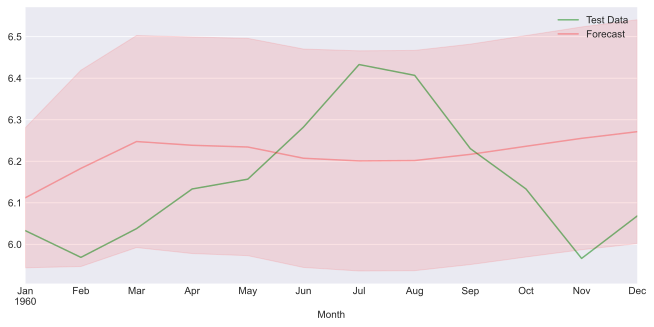

In [35]:
# get the test predictions and plot 

ns_test_pred, confint = ns_model.predict(n_periods = Ntest, return_conf_int=True)

fig, axes = plt.subplots(figsize = (11,5))

test['LogPassengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Test Data')

ns_test_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.grid()

Predictions does not seem to be very accurate!

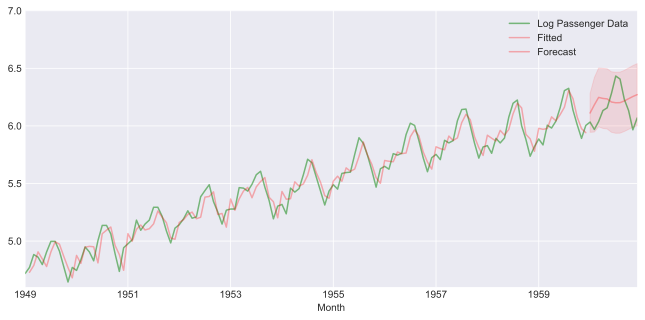

In [37]:
ns_train_pred = ns_model.predict_in_sample(start = 1, end = -1) # start is 1 now!! as the model use differencing 

fig, axes = plt.subplots(figsize = (11,5))

df['LogPassengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Log Passenger Data')

ns_train_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Fitted')

ns_test_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.set_ylim(4.6,7)

axes.grid()

In [39]:
# Check the RMSE 

print(f"Test RMSE for the non-seasonal ARIMA(4,1,2) is: {mean_squared_error(test['Passengers'], np.exp(ns_test_pred), squared=False):.2f}")

Test RMSE for the non-seasonal ARIMA(4,1,2) is: 83.31


Much larger than what we obtained by a ARIMA(12,1,0) model! 

In [41]:
# Test auto_arima again with setting stepwise = False

model = pm.auto_arima(train['LogPassengers'], trace = True, suppress_warnings=True, max_p = 12, max_q = 2, max_order = 14, stepwise=False, seasonal = False)

# max_order is used to constrain the total sum of p,d,q 

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.296, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-250.915, Time=0.34 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 226.846
Date:                Wed, 10 Apr 2024   AIC                           -423.692
Time:                        13:02:22   BIC                           -380.564
Sample:                    01-01-1949   HQIC                          -406.167
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0065      0.006      1.133      0.257      -0.005       0.018
ar.L1          0.0313      0.089      0.353      0.724      -0.143       0.205
ar.L2         -0.0779      0.068     -1.143      0.253      -0.211       0.056
ar.L3         -0.0311      0.067     -0.467      0.640      -0.162       0.099
ar.L4         -0.1044      0.071     -1.466      0.143      -0.244       0.035
ar.L5          0.0038      0.065      0.058      0.954      -0.124       0.131
ar.L6         -0.0553      0.067     -0.827      0.408      -0.186       0.076
ar.L7         -0.0412      0.072     -0.575      0.565      -0.182       0.099
ar.L8         -0.1159      0.066     -1.757      0.079      -0.245       0.013
ar.L9          0.0006      0.078      0.008      0.993      -0.151       0.153
ar.L10        -0.0677      0.065     -1.042      0.297      -0.195       0.060
ar.L11         0.0047      0.071      0.066      0.948      -0.135       0.144
ar.L12         0.7949      0.063     12.689      0.000       0.672       0.918
ma.L1         -0.3626      0.125     -2.902      0.004      -0.607      -0.118
sigma2         0.0016      0.000      7.015      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.42
Prob(Q):                              1.00   Prob(JB):                         0.30
Heteroskedasticity (H):               0.36   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best Model has one additional MA order than what we found manually!

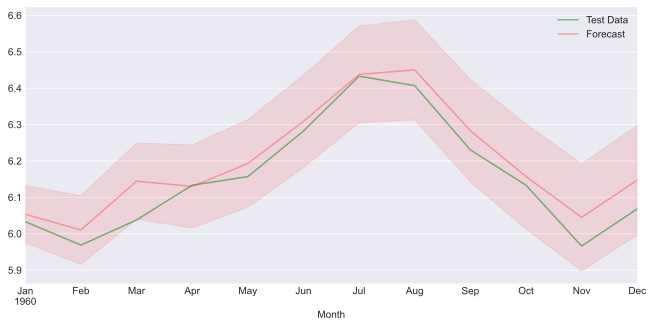

In [43]:
# get the test predictions and plot 

test_pred, confint = model.predict(n_periods = Ntest, return_conf_int=True)

fig, axes = plt.subplots(figsize = (11,5))

test['LogPassengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Test Data')

test_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.grid()

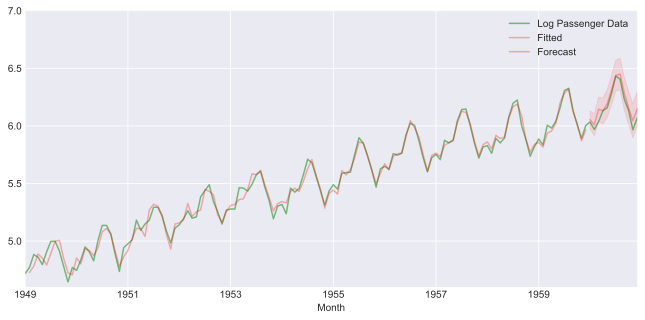

In [44]:
train_pred = model.predict_in_sample(start = 1, end = -1) # start is 1 now!! as the model use differencing 

fig, axes = plt.subplots(figsize = (11,5))

df['LogPassengers'].plot(ax = axes, color = 'green', alpha = 0.5, label = 'Log Passenger Data')

train_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Fitted')

test_pred.plot(ax = axes, color = 'red', alpha = 0.3, label = 'Forecast')

axes.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.1)

axes.legend()

axes.set_ylim(4.6,7)

axes.grid()

In [47]:
# Check the RMSE 

print(f"Test RMSE for the non-seasonal ARIMA(12,1,1) is: {mean_squared_error(test['Passengers'], np.exp(test_pred), squared=False):.3f}")

Test RMSE for the non-seasonal ARIMA(12,1,1) is: 24.101


This is a worse model than what we found earlier manually ARIMA(12,1,0) where RMSE was 16.10! Finding the best AIC (according to auto_arima) does not mean minimizing the out of sample test error. AIC metric seek and care about the model complexity however the RMSE metric has no reference to the model complexity and simply care about out of sample accuracy.